# Phase 1

1. **Generate Insights with ChatGPT** <br>
To solve the case study effectively, I utilized ChatGPT as an assistant for various analytical tasks. Below are the interactions with ChatGPT, including my prompts and the responses received. <br>
[Click here to open the file](./chatgpt-insight.docx) <br>


2. **Evaluate ChatGPT’s Responses** <br>

a. The first step is true like loading the data, see the brief information from the data, checking missing value and duplicate records. <br>

b. The handling missing values process overall is good but we can deepen our analysis by identifying the column based on three categories (MNAR, MAR, MCAR). <br>

- MNAR
- MAR
- MCAR

c. The conversion of data type process was right. We must convert the data into suitable type. For example: `Visit Time` must be in datetime. <br>

d. The Handling duplicate process was right. Check if the row has the same `Visitor ID`, `Visit Time` and `Product SKU`, we can remove them and keep it only one row. <br>


# Phase 2

## I. Importing Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import scipy.stats as stats
from scipy.stats.mstats import winsorize

## II. Data Loading

In [3]:
raw_data = pd.read_csv('ecommerce-session-bigquery.csv')

## III. Exploratory Data Analysis (EDA)

In [4]:
raw_data.columns

Index(['fullVisitorId', 'channelGrouping', 'time', 'country', 'city',
       'totalTransactionRevenue', 'transactions', 'timeOnSite', 'pageviews',
       'sessionQualityDim', 'date', 'visitId', 'type', 'productRefundAmount',
       'productQuantity', 'productPrice', 'productRevenue', 'productSKU',
       'v2ProductName', 'v2ProductCategory', 'productVariant', 'currencyCode',
       'itemQuantity', 'itemRevenue', 'transactionRevenue', 'transactionId',
       'pageTitle', 'searchKeyword', 'pagePathLevel1', 'eCommerceAction_type',
       'eCommerceAction_step', 'eCommerceAction_option'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fullVisitorId            10000 non-null  uint64 
 1   channelGrouping          10000 non-null  object 
 2   time                     10000 non-null  int64  
 3   country                  10000 non-null  object 
 4   city                     10000 non-null  object 
 5   totalTransactionRevenue  619 non-null    float64
 6   transactions             628 non-null    float64
 7   timeOnSite               9713 non-null   float64
 8   pageviews                9999 non-null   float64
 9   sessionQualityDim        19 non-null     float64
 10  date                     10000 non-null  int64  
 11  visitId                  10000 non-null  int64  
 12  type                     10000 non-null  object 
 13  productRefundAmount      0 non-null      float64
 14  productQuantity        

In [6]:
raw_data

,fullVisitorId,channelGrouping,time,country,city,totalTransactionRevenue,transactions,timeOnSite,pageviews,sessionQualityDim,...,itemQuantity,itemRevenue,transactionRevenue,transactionId,pageTitle,searchKeyword,pagePathLevel1,eCommerceAction_type,eCommerceAction_step,eCommerceAction_option
0,2515546493837534633,Organic Search,966564,Taiwan,(not set),NaN,NaN,1567.0,82.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
1,9361741997835388618,Organic Search,157377,France,not available in demo dataset,NaN,NaN,321.0,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
2,7313828956068851679,Referral,228279,United States,San Francisco,NaN,NaN,927.0,11.0,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
3,6036794406403793540,Organic Search,1615618,United States,Boulder,NaN,NaN,1616.0,13.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
4,7847280609739507227,Organic Search,37832,Canada,not available in demo dataset,NaN,NaN,1222.0,45.0,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8518740059623315737,Referral,83144,United States,Ann Arbor,NaN,NaN,561.0,18.0,NaN,...,NaN,NaN,NaN,NaN,Bags,NaN,/google+redesign/,0,1,NaN
9996,1592171014215970461,Organic Search,302378,Colombia,Bogota,NaN,NaN,365.0,7.0,NaN,...,NaN,NaN,NaN,NaN,Bags,NaN,/google+redesign/,0,1,NaN
9997,6776942687101397292,Affiliates,41387,Israel,not available in demo dataset,NaN,NaN,107.0,7.0,NaN,...,NaN,NaN,NaN,NaN,Bags,NaN,/google+redesign/,0,1,NaN
9998,3008082643543388126,Organic Search,28613,Canada,Montreal,NaN,NaN,93.0,11.0,NaN,...,NaN,NaN,NaN,NaN,Bags,NaN,/google+redesign/,0,1,NaN


In [7]:
raw_data.describe()

,fullVisitorId,time,totalTransactionRevenue,transactions,timeOnSite,pageviews,sessionQualityDim,date,visitId,productRefundAmount,...,productPrice,productRevenue,itemQuantity,itemRevenue,transactionRevenue,transactionId,searchKeyword,eCommerceAction_type,eCommerceAction_step,eCommerceAction_option
count,1.000000e+04,1.000000e+04,6.190000e+02,628.000000,9713.000000,9999.000000,19.000000,1.000000e+04,1.000000e+04,0.0,...,1.000000e+04,0.0,0.0,0.0,0.0,0.0,0.0,10000.000000,10000.0,0.0
mean,4.538050e+18,3.248462e+05,2.103635e+08,1.050955,720.119222,22.142114,50.210526,2.016097e+07,1.473169e+09,NaN,...,1.585565e+07,NaN,NaN,NaN,NaN,NaN,NaN,0.071500,1.0,NaN
std,3.038982e+18,5.647221e+05,5.656026e+08,0.289005,967.997653,26.631372,32.481754,9.067598e+02,2.518655e+06,NaN,...,2.095339e+07,NaN,NaN,NaN,NaN,NaN,NaN,0.363595,0.0,NaN
min,1.664653e+14,0.000000e+00,3.530000e+06,1.000000,1.000000,1.000000,1.000000,2.016080e+07,1.470036e+09,NaN,...,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.0,NaN
25%,1.701094e+18,4.252400e+04,5.508000e+07,1.000000,164.000000,7.000000,19.500000,2.016082e+07,1.471555e+09,NaN,...,4.990000e+06,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.0,NaN
50%,4.449181e+18,1.357180e+05,9.542000e+07,1.000000,383.000000,14.000000,62.000000,2.016090e+07,1.473019e+09,NaN,...,9.990000e+06,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.0,NaN
75%,7.170959e+18,3.542545e+05,1.866600e+08,1.000000,898.000000,27.000000,79.000000,2.016092e+07,1.474471e+09,NaN,...,1.599000e+07,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.0,NaN
max,9.994767e+18,1.089403e+07,6.831960e+09,6.000000,15020.000000,429.000000,92.000000,2.017080e+07,1.501622e+09,NaN,...,9.999000e+07,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,1.0,NaN


### III.A. Check Missing Values

In [8]:
def check_missing_values(df):
    """
    Check for missing values and data types in each column of the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame to check for missing values and types.
    
    Returns:
    pd.DataFrame: A DataFrame containing the column names, number of missing values, and data types.
    """
    # Count missing values in each column
    missing_values = df.isnull().sum()
    
    # Get data types of each column
    data_types = df.dtypes
    
    # Create a DataFrame to hold the results
    result_df = pd.DataFrame({
        'Column Name': missing_values.index,
        'Missing Values': missing_values.values,
        'Data Type': data_types.values
    })
    
    # Filter to include only columns with missing values
    result_df = result_df[result_df['Missing Values'] > 0]
    
    return result_df.reset_index(drop=True)

In [9]:
check_missing_values(raw_data)

,Column Name,Missing Values,Data Type
0,totalTransactionRevenue,9381,float64
1,transactions,9372,float64
2,timeOnSite,287,float64
3,pageviews,1,float64
4,sessionQualityDim,9981,float64
5,productRefundAmount,10000,float64
6,productQuantity,9955,float64
7,productRevenue,10000,float64
8,currencyCode,386,object
9,itemQuantity,10000,float64


Since almost all or all values in these columns are null, we can remove them because it hasn't any significant value to be analyze:
1. totalTransactionRevenue 
2. transactions 
3. sessionQualityDim 
4. productRefundAmount 
5. productQuantity 
6. productRevenue
7. itemQuantity 
8. itemRevenue 
9. transactionRevenue 
10. transactionId 
11. searchKeyword 
12. eCommerceAction_option

In [10]:
null_counts = raw_data.isnull().sum()
print(null_counts[null_counts < 9000].index)

Index(['fullVisitorId', 'channelGrouping', 'time', 'country', 'city',
       'timeOnSite', 'pageviews', 'date', 'visitId', 'type', 'productPrice',
       'productSKU', 'v2ProductName', 'v2ProductCategory', 'productVariant',
       'currencyCode', 'pageTitle', 'pagePathLevel1', 'eCommerceAction_type',
       'eCommerceAction_step'],
      dtype='object')


### III.B. Check Duplicates

In [11]:
duplicate_counter = 0

for i in raw_data.duplicated():
    if i == True:
        duplicate_counter += 1
    
duplicate_counter

0

Data hasn't any duplicate rows.

### III.C. Check Cardinality

In [12]:
def cardinality_check_all(data):
    # Tampilan dengan max column
    pd.set_option('display.max_colwidth', None)

    # output bernama listItem
    listItem = []

    # Looping column di dalam dataframe
    for col in data.columns:
        # Menambahkan 'nama kolom', 'jumlah nilai unique', 'nilai unique' ke listItem
        listItem.append([col, data[col].nunique(), data[col].unique()])

    # Hasil dalam dataframe
    summary_cardinality = pd.DataFrame(columns=['Column Name', 'Total Unique Value', 'Unique Value'], data=listItem)

    return summary_cardinality

In [13]:
cardinality_check_all(raw_data)

,Column Name,Total Unique Value,Unique Value
0,fullVisitorId,6655,"[2515546493837534633, 9361741997835388618, 7313828956068851679, 6036794406403793540, 7847280609739507227, 1371078687799372953, 8781227467221587011, 7328657227470299189, 603507101721972238, 2410100047658323318, 6359403243542167475, 4563918079034331605, 3502451034522748027, 6254574407334719565, 1419842828452102862, 9893914155363716533, 8401606893927168081, 997271511212133268, 7932128536242606019, 270151597804400653, 5024679608681889824, 9277087807699365026, 6238727055806281579, 5423592976649570115, 1541266830764459196, 699976157636552636, 7732587129685157308, 2202664573111437742, 9168169211376831714, 5943570432517890376, 8576322827547946074, 7382833428985431536, 8787831631722916694, 2870803664675052699, 2147744904815697190, 9178221796764045442, 7152313806704388410, 3173550449318977052, 1480903445344176459, 1467123776208186522, 533002805635095618, 200484347423235614, 9476348446859765776, 2295899904627923606, 8419756081037021527, 1392300334983707070, 7199611745811583535, 4647588580441750841, 9991894785574881952, 7236137462224659682, 2709295266531200360, 1555201124395352017, 5888802067059051670, 972701135095018930, 4716992909071963636, 1477606480597254796, 199372328838179522, 8074041050560984021, 9220725592862295655, 8436386941727850000, 3490247300164616158, 3612654415521437638, 1663588776724483567, 9147040901883884693, 9797908425913223681, 2341378980401323198, 4320783551704996160, 1943869482822454511, 9191103239009197198, 754996305428322594, 1957458976293878100, 627998342647039878, 657364648407623467, 4421062057307625296, 6857808114330834445, 4784312403795214032, 1894617860778311526, 8838182569236459287, 2324201609630245980, 7478927596935085715, 6242959767156912467, 5684038220144421116, 5978695388391511791, 9861780131991859576, 1804239377906376107, 7040959099482116852, 8857606652713260627, 2675288268782734510, 456807427403774085, 9329481831754645981, 4009212492683421907, 4532291238450213115, 873413313017080739, 509291892849260639, 3503177740835852213, 1578160320414711416, 70976956518566605, 1057078399235259309, 1958027061626351603, 9053770505272120887, ...]"
1,channelGrouping,8,"[Organic Search, Referral, Direct, Social, Affiliates, Display, (Other), Paid Search]"
2,time,7837,"[966564, 157377, 228279, 1615618, 37832, 478901, 119567, 1115991, 63158, 487916, 161016, 1165111, 260638, 59946, 766951, 205156, 563230, 180572, 952790, 2124128, 3155627, 46551, 247432, 42645, 1549778, 371826, 227064, 240727, 1277976, 43712, 133357, 812138, 12679, 25002, 37117, 580038, 552887, 530204, 1073045, 185172, 29041, 113716, 464668, 195408, 184377, 930039, 95056, 2146193, 131493, 841710, 103034, 79584, 326740, 133728, 44936, 182354, 1326186, 259775, 1099402, 573916, 1995430, 317958, 42695, 1308248, 242287, 106145, 1273519, 438957, 160173, 163342, 4668998, 481297, 711919, 280706, 245746, 1511340, 374805, 117911, 2327333, 0, 480404, 801885, 124471, 87801, 91204, 9743, 68534, 188079, 161895, 218011, 22988, 251719, 249729, 51998, 1072808, 39183, 189998, 206752, 176395, 264419, ...]"
3,country,106,"[Taiwan, France, United States, Canada, India, New Zealand, Italy, Denmark, Germany, Guatemala, Singapore, Switzerland, Ukraine, Brazil, Japan, Ireland, Hong Kong, Thailand, Bangladesh, Vietnam, Saudi Arabia, Australia, United Kingdom, Venezuela, Slovakia, Netherlands, Trinidad & Tobago, Czechia, Croatia, Poland, Spain, South Africa, Philippines, Mexico, Uruguay, Nigeria, Sweden, (not set), Sri Lanka, Chile, Peru, Pakistan, Malta, Bolivia, Costa Rica, Egypt, Puerto Rico, Belgium, Russia, Turkey, Israel, Colombia, China, South Korea, United Arab Emirates, Lithuania, Dominican Republic, Latvia, Finland, Austria, Portugal, Romania, Indonesia, Norway, Slovenia, Argentina, Montenegro, Nicaragua, Cameroon, Kazakhstan, Greece, Gabon, Panama, Malaysia, Luxembourg, Ghana, Bulgaria, Serbia, Georgia, Belarus, Oman, Hungary, Iceland, El Salvador, Kosovo, Kuwait, Jordan, Bosnia & Herzegovina, Honduras, Leban

We can categorize the columns based on their data types and roles in the analysis.

In [14]:
num_cols = ['time', 'totalTransactionRevenue', 'transactions', 'timeOnSite', 'pageviews', 'productPrice']
time = ['date']
cat_cols = ['fullVisitorId', 'channelGrouping', 'country', 'city', 'visitId', 'type', 'productSKU', 'v2ProductName', 'v2ProductCategory', 'currencyCode', 'pageTitle', 'pagePathLevel1', 'eCommerceAction_type', 'eCommerceAction_step']

### III.D. Check Central Tendency

In [15]:
# Print mean, median, mode, skewness of every columns
def central_tendency_checker(data, cols):
    for col in cols:
        print(f'Mean of {col}   : ', data[col].mean())
        print(f'Median of {col} : ', data[col].median())
        print(f'Mode of {col}   : ', data[col].mode()[0])
        print(f'Skewness of {col}   : ', data[col].skew())
        print('')
    return

In [16]:
central_tendency_checker(raw_data, num_cols)

Mean of time   :  324846.2225
Median of time :  135718.0
Mode of time   :  0
Skewness of time   :  5.101314037529316

Mean of totalTransactionRevenue   :  210363537.9644588
Median of totalTransactionRevenue :  95420000.0
Mode of totalTransactionRevenue   :  64990000.0
Skewness of totalTransactionRevenue   :  8.83446131613073

Mean of transactions   :  1.0509554140127388
Median of transactions :  1.0
Mode of transactions   :  1.0
Skewness of transactions   :  9.93658150713739

Mean of timeOnSite   :  720.1192216616905
Median of timeOnSite :  383.0
Mode of timeOnSite   :  191.0
Skewness of timeOnSite   :  3.7767543659432437

Mean of pageviews   :  22.14211421142114
Median of pageviews :  14.0
Mode of pageviews   :  7.0
Skewness of pageviews   :  4.39347374540614

Mean of productPrice   :  15855650.0
Median of productPrice :  9990000.0
Mode of productPrice   :  4990000
Skewness of productPrice   :  2.3206957980677547



Insight:<br>
- **Revenue is dominated by a few big spenders** → Most users generate much less.
- **Most users make only one purchase per visit.**
- **Many users leave quickly** → Session duration and pageviews are skewed by a few long visits.
- **Lower-priced products sell more, but expensive ones contribute most to revenue.**

### III.E. Check Outlier

In [17]:
# Function to find outlier boundaries using IQR for each variable with adjustable distance based on skewness
def find_outlier_boundaries(data, columns):
    boundaries = {}

    for col in columns:
        # Calculate the skewness of the column
        col_skewness = data[col].skew()

        # Decide on the distance factor based on skewness
        if abs(col_skewness) > 1:  # Highly outlier if skewness > 1 or < -1
            distance = 3
        else:  # Moderate skew or close to normal
            distance = 1.5

        # Calculate the IQR for each column
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate the lower and upper boundaries based on the chosen distance
        lower_boundary = Q1 - (IQR * distance)
        upper_boundary = Q3 + (IQR * distance)

        # Store the results in a dictionary
        boundaries[col] = {
            'upper_boundary': upper_boundary,
            'lower_boundary': lower_boundary,
        }

        # Count outliers in the column
        outliers = data[(data[col] > upper_boundary) | (data[col] < lower_boundary)]
        outliers_count = len(outliers)

        # Calculate the percentage of outliers
        total_count = len(data)
        outliers_percentage = (outliers_count / total_count) * 100

        # Print the results for each column
        print(f"Column: {col}")
        print(f"  Upper Boundary: {upper_boundary}")
        print(f"  Lower Boundary: {lower_boundary}")
        print(f"  Number of Outliers: {outliers_count}")
        print(f"  Percentage of Outliers: {outliers_percentage:.2f}%")
        print("")

    return boundaries  # Return the boundaries dictionary

In [18]:
find_outlier_boundaries(raw_data, num_cols)

Column: time
  Upper Boundary: 1289446.0
  Lower Boundary: -892667.5
  Number of Outliers: 526
  Percentage of Outliers: 5.26%

Column: totalTransactionRevenue
  Upper Boundary: 581400000.0
  Lower Boundary: -339660000.0
  Number of Outliers: 28
  Percentage of Outliers: 0.28%

Column: transactions
  Upper Boundary: 1.0
  Lower Boundary: 1.0
  Number of Outliers: 27
  Percentage of Outliers: 0.27%

Column: timeOnSite
  Upper Boundary: 3100.0
  Lower Boundary: -2038.0
  Number of Outliers: 287
  Percentage of Outliers: 2.87%

Column: pageviews
  Upper Boundary: 87.0
  Lower Boundary: -53.0
  Number of Outliers: 276
  Percentage of Outliers: 2.76%

Column: productPrice
  Upper Boundary: 48990000.0
  Lower Boundary: -28010000.0
  Number of Outliers: 890
  Percentage of Outliers: 8.90%



{'time': {'upper_boundary': 1289446.0, 'lower_boundary': -892667.5},
 'totalTransactionRevenue': {'upper_boundary': 581400000.0,
  'lower_boundary': -339660000.0},
 'transactions': {'upper_boundary': 1.0, 'lower_boundary': 1.0},
 'timeOnSite': {'upper_boundary': 3100.0, 'lower_boundary': -2038.0},
 'pageviews': {'upper_boundary': 87.0, 'lower_boundary': -53.0},
 'productPrice': {'upper_boundary': 48990000.0, 'lower_boundary': -28010000.0}}

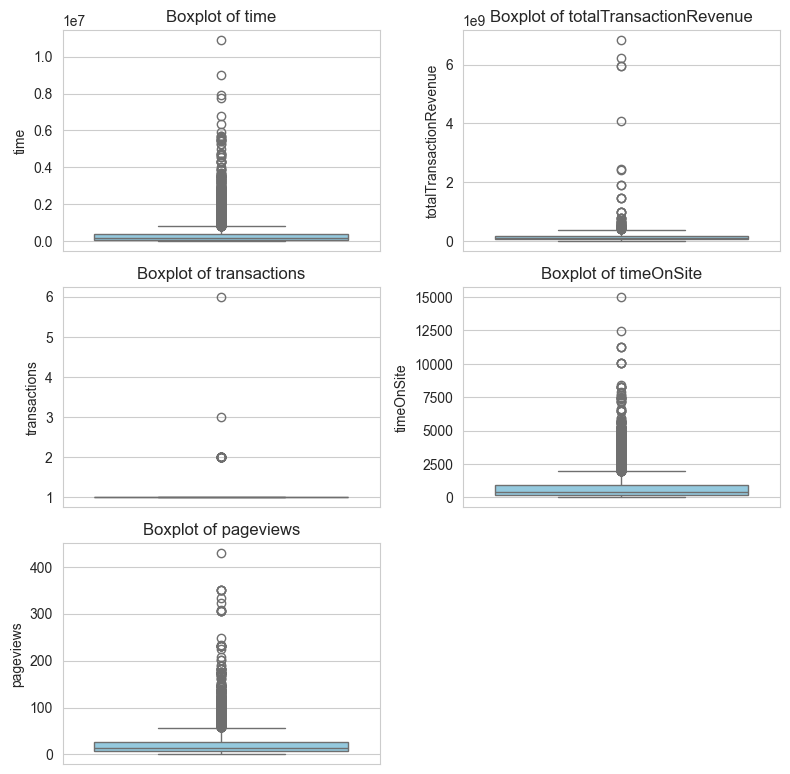

In [19]:
# Set plot style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))
axes = axes.flatten()

# Plot boxplots for each numerical column
for i, col in enumerate(num_cols):
    sns.boxplot(y=raw_data[col], ax=axes[i], color="skyblue")
    axes[i].set_title(f"Boxplot of {col}")

# Remove empty subplot if odd number of plots
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


Insight: <br>

**Presence of Extreme Outliers** <br>
- All boxplots show a large number of outliers, especially in `totalTransactionRevenue`, `time`, `timeOnSite`, and `pageviews`.
- This suggests that while most users behave within a common range, a few users exhibit extreme behavior (e.g., very high spending, long sessions, or excessive pageviews).

**Right-Skewed Distributions** <br>
- The distributions are heavily skewed to the right, indicating that most users spend less time, make fewer transactions, and generate lower revenue.
- A small number of users contribute disproportionately to the totals.


### III.F. Check Correlation

In [20]:
def plot_correlation_matrix(df, list_of_columns):
    """
    Visualize the correlation matrix using a heatmap.
    
    Parameters:
    correlation_matrix (pd.DataFrame): The correlation matrix to visualize.
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(df[list_of_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix Heatmap')
    plt.show()

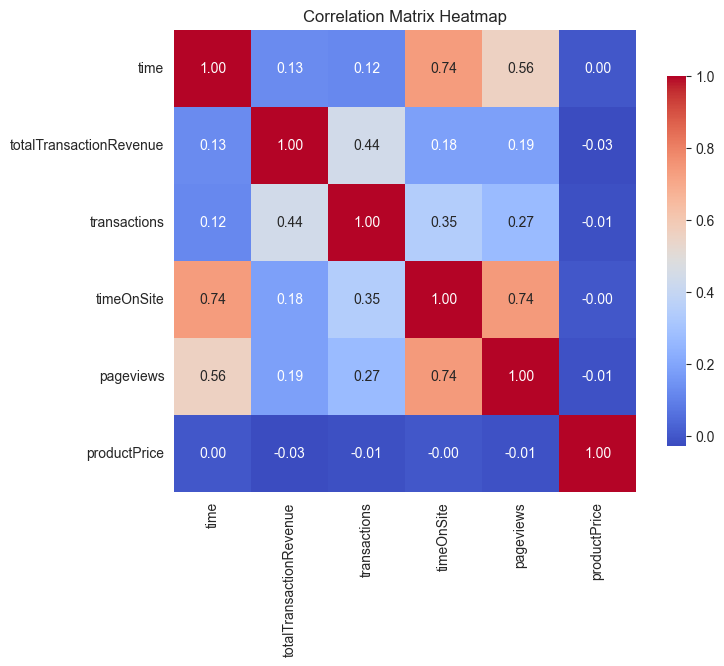

In [21]:
plot_correlation_matrix(raw_data, num_cols)

There are some correlation in these variables: <br>
1. `timeOnSite` and `time` <br>
2. `timeOnSite` and `pageviews` <br>

### III.G. Check Distribution

Check the distribution of every numerical columns.

In [22]:
num_cols

['time',
 'totalTransactionRevenue',
 'transactions',
 'timeOnSite',
 'pageviews',
 'productPrice']

#### `time`

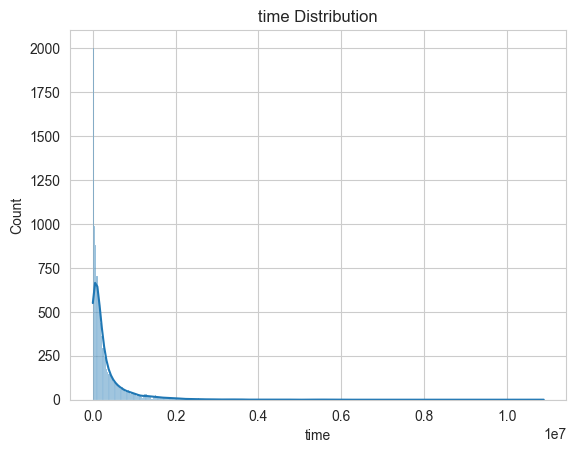

In [23]:
sns.histplot(raw_data['time'], kde=True)
plt.title('time Distribution')
plt.show()

Insight: <br>

- The `time` distribution is highly **right-skewed**, indicating that most users have low values for this metric, while a few have significantly high values.
- The **peak near zero** suggests that a large number of users spend very little time.
- The **long tail** confirms the presence of extreme outliers who spend disproportionately more time compared to the majority.

#### `totalTransactionRevenue`

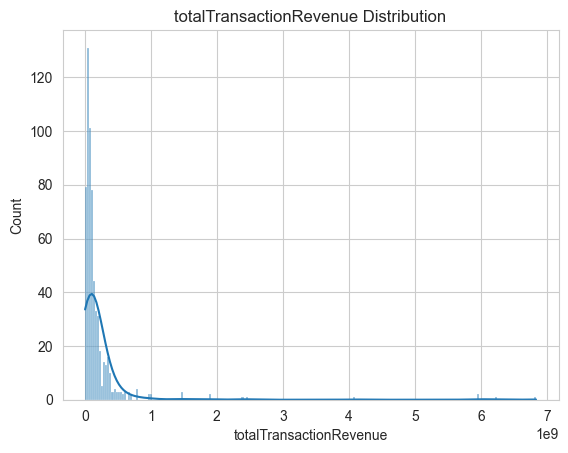

In [24]:
sns.histplot(raw_data['totalTransactionRevenue'], kde=True)
plt.title('totalTransactionRevenue Distribution')
plt.show()

Insight: <br>

- The `totalTransactionRevenue` distribution is **heavily right-skewed**, meaning most users generate low revenue, while a small fraction contributes significantly higher amounts.
- The **sharp peak near zero** suggests that a majority of users either make small transactions or none at all.
- The **long tail** indicates the presence of high-spending users who contribute disproportionately to total revenue.

#### `transactions`

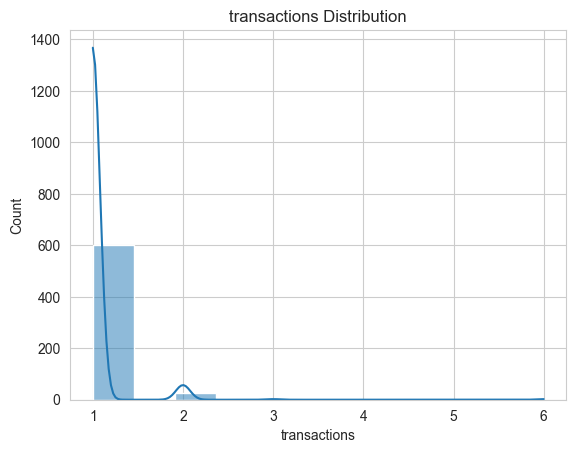

In [25]:
sns.histplot(raw_data['transactions'], kde=True)
plt.title('transactions Distribution')
plt.show()

Insight: <br>

- The `transactions` distribution is **highly right-skewed**, indicating that most users make only **one transaction**.
- A **small number of users** complete multiple transactions, but they are rare.
- The **sharp peak at 1** suggests that the majority of users do not return for repeat purchases.

#### `timeOnSite`

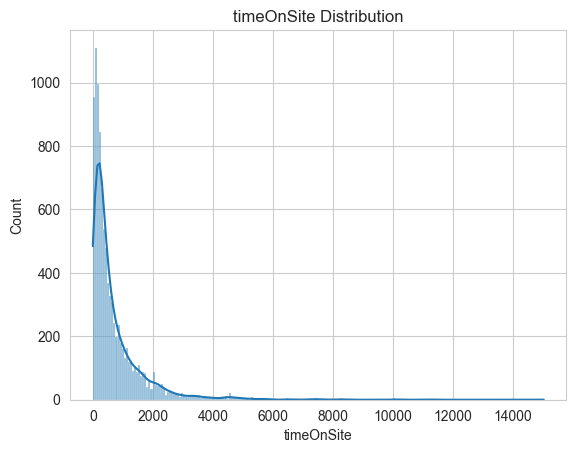

In [26]:
sns.histplot(raw_data['timeOnSite'], kde=True)
plt.title('timeOnSite Distribution')
plt.show()

Insight: <br>

- The `timeOnSite` distribution is **highly right-skewed**, meaning that most users spend **a short amount of time** on the website.
- A **small number of users** spend significantly more time, leading to a long tail in the distribution.
- The **sharp peak near zero** suggests that many users leave the site quickly, possibly indicating **low engagement** or **high bounce rates**.

#### `pageviews`

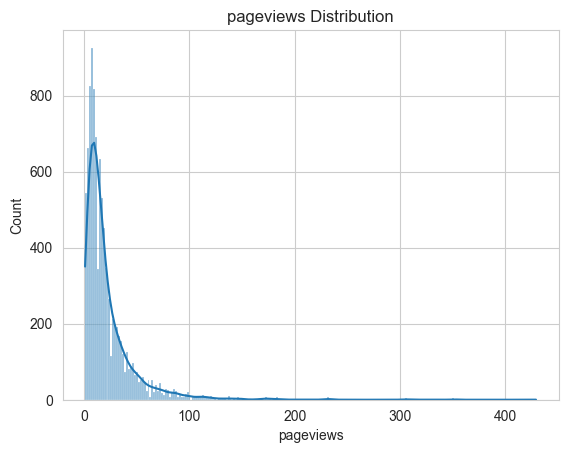

In [27]:
sns.histplot(raw_data['pageviews'], kde=True)
plt.title('pageviews Distribution')
plt.show()

Insight: <br>

- The `pageviews` distribution is **heavily right-skewed**, indicating that most users view **only a few pages** during their visit.
- A **sharp peak near zero** suggests a large proportion of users visit very few pages before leaving.
- A **long tail** signifies that a small subset of users browse a **high number of pages**.
- This pattern may indicate **low engagement** from the majority of users, while a smaller group explores the site more deeply.

#### `productPrice`

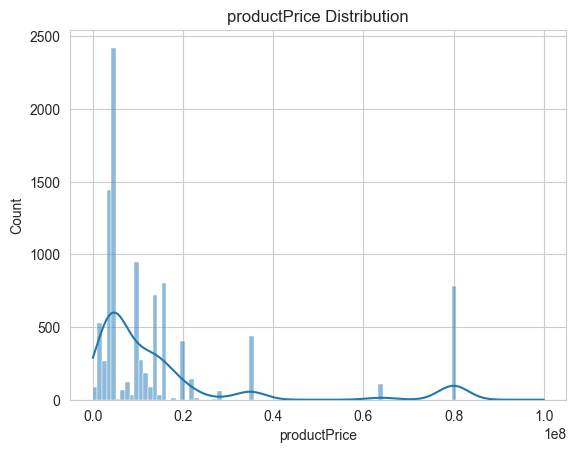

In [28]:
sns.histplot(raw_data['productPrice'], kde=True)
plt.title('productPrice Distribution')
plt.show()

Insight: <br>

- The distribution is **right-skewed**, meaning most products are in the **lower price range**, while a few are significantly more expensive.
- There are **multiple peaks**, suggesting the presence of **price clusters**—possibly different product categories or pricing strategies.
- A **notable spike around certain price points** could indicate common price thresholds or marketing-driven price points.
- The long tail shows the presence of **high-value items**, but these are much less frequent.

## IV. Data Pre-Processing

### IV.A. Drop Unvalue Columns

In [29]:
data = raw_data[['fullVisitorId', 'channelGrouping', 'time', 'country', 'city',
       'timeOnSite', 'pageviews', 'date', 'visitId', 'type', 'productPrice',
       'productSKU', 'v2ProductName', 'v2ProductCategory', 'productVariant',
       'currencyCode', 'pageTitle', 'pagePathLevel1', 'eCommerceAction_type',
       'eCommerceAction_step']]

#### Redefine selected datatype

In [ ]:
num_cols = ['timeOnSite', 'pageviews', 'productPrice', 'time']
time = ['date']
cat_cols = ['fullVisitorId', 'channelGrouping', 'country', 'city', 'visitId', 'type',
            'productSKU', 'v2ProductName', 'v2ProductCategory', 'currencyCode', 'productVariant'
            'pageTitle', 'pagePathLevel1', 'eCommerceAction_type','eCommerceAction_step']

In [31]:
data

,fullVisitorId,channelGrouping,time,country,city,timeOnSite,pageviews,date,visitId,type,productPrice,productSKU,v2ProductName,v2ProductCategory,productVariant,currencyCode,pageTitle,pagePathLevel1,eCommerceAction_type,eCommerceAction_step
0,2515546493837534633,Organic Search,966564,Taiwan,(not set),1567.0,82.0,20170721,1500643403,PAGE,0,9180781,Suitcase Organizer Cubes,(not set),(not set),USD,NaN,/storeitem.html,0,1
1,9361741997835388618,Organic Search,157377,France,not available in demo dataset,321.0,8.0,20170413,1492114470,PAGE,0,9180793,26 oz Double Wall Insulated Bottle,(not set),(not set),USD,NaN,/storeitem.html,0,1
2,7313828956068851679,Referral,228279,United States,San Francisco,927.0,11.0,20170727,1501198444,PAGE,0,9180838,Metal Texture Roller Pen,(not set),(not set),USD,NaN,/storeitem.html,0,1
3,6036794406403793540,Organic Search,1615618,United States,Boulder,1616.0,13.0,20170731,1501522359,PAGE,0,9180838,Metal Texture Roller Pen,(not set),(not set),USD,NaN,/storeitem.html,0,1
4,7847280609739507227,Organic Search,37832,Canada,not available in demo dataset,1222.0,45.0,20170728,1501300311,PAGE,0,9180838,Metal Texture Roller Pen,(not set),(not set),USD,NaN,/storeitem.html,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8518740059623315737,Referral,83144,United States,Ann Arbor,561.0,18.0,20160809,1470768035,PAGE,4990000,GGOEGBMJ013399,Sport Bag,Home/Limited Supply/Bags/,(not set),USD,Bags,/google+redesign/,0,1
9996,1592171014215970461,Organic Search,302378,Colombia,Bogota,365.0,7.0,20161005,1475679617,PAGE,4990000,GGOEGBMJ013399,Sport Bag,Home/Bags/,(not set),USD,Bags,/google+redesign/,0,1
9997,6776942687101397292,Affiliates,41387,Israel,not available in demo dataset,107.0,7.0,20160901,1472737682,PAGE,4990000,GGOEGBMJ013399,Sport Bag,Home/Bags/,(not set),USD,Bags,/google+redesign/,0,1
9998,3008082643543388126,Organic Search,28613,Canada,Montreal,93.0,11.0,20160929,1475183739,PAGE,4990000,GGOEGBMJ013399,Sport Bag,Home/Bags/,(not set),USD,Bags,/google+redesign/,0,1


### IV.B. Handling Datatype

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fullVisitorId         10000 non-null  uint64 
 1   channelGrouping       10000 non-null  object 
 2   time                  10000 non-null  int64  
 3   country               10000 non-null  object 
 4   city                  10000 non-null  object 
 5   timeOnSite            9713 non-null   float64
 6   pageviews             9999 non-null   float64
 7   date                  10000 non-null  int64  
 8   visitId               10000 non-null  int64  
 9   type                  10000 non-null  object 
 10  productPrice          10000 non-null  int64  
 11  productSKU            10000 non-null  object 
 12  v2ProductName         10000 non-null  object 
 13  v2ProductCategory     10000 non-null  object 
 14  productVariant        10000 non-null  object 
 15  currencyCode        

#### `date`

Change the datatype of `date` from integer into datetime with Year-Month-Day format.

In [33]:
data["date"] = pd.to_datetime(data["date"], format="%Y%m%d")

C:\Users\rsaka\AppData\Local\Temp\ipykernel_2220\670447248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["date"] = pd.to_datetime(data["date"], format="%Y%m%d")


In [34]:
data['date']

0      2017-07-21
1      2017-04-13
2      2017-07-27
3      2017-07-31
4      2017-07-28
          ...    
9995   2016-08-09
9996   2016-10-05
9997   2016-09-01
9998   2016-09-29
9999   2016-09-04
Name: date, Length: 10000, dtype: datetime64[ns]

#### `time`

In [35]:
data['time'].describe()


count    1.000000e+04
mean     3.248462e+05
std      5.647221e+05
min      0.000000e+00
25%      4.252400e+04
50%      1.357180e+05
75%      3.542545e+05
max      1.089403e+07
Name: time, dtype: float64

In [47]:
data['time'] = pd.to_timedelta(data['time'], unit='s')

C:\Users\rsaka\AppData\Local\Temp\ipykernel_2220\540990363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time'] = pd.to_timedelta(data['time'], unit='s')


In [48]:
data['time']

0      11 days 04:29:24
1       1 days 19:42:57
2       2 days 15:24:39
3      18 days 16:46:58
4       0 days 10:30:32
             ...       
9995    0 days 23:05:44
9996    3 days 11:59:38
9997    0 days 11:29:47
9998    0 days 07:56:53
9999    4 days 17:08:05
Name: time, Length: 10000, dtype: timedelta64[ns]

It's seems that the `time` column might represent total time spent across multiple visits.

### Redefine selected datatype

In [ ]:
num_cols = ['timeOnSite', 'pageviews', 'productPrice']
time = ['date', 'time']
cat_cols = ['fullVisitorId', 'channelGrouping', 'country', 'city', 'visitId', 'type',
            'productSKU', 'v2ProductName', 'v2ProductCategory', 'currencyCode', 'productVariant'
            'pageTitle', 'pagePathLevel1', 'eCommerceAction_type','eCommerceAction_step']

### IV.C. Handling Missing Values

#### Numerical Data

In [231]:
# Create SimpleImputer objects
imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')

# Loop over numerical columns
for num in num_cols:
    skewness = data[num].skew()

    if -0.5 <= skewness <= 0.5:
        # Use mean imputation for normally distributed data
        data[num] = imputer_mean.fit_transform(data[[num]]).ravel()  # Flatten to 1D
    else:
        # Use median imputation for skewed data
        data[num] = imputer_median.fit_transform(data[[num]]).ravel()  # Flatten to 1D

C:\Users\rsaka\AppData\Local\Temp\ipykernel_8312\2011632122.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[num] = imputer_median.fit_transform(data[[num]]).ravel()  # Flatten to 1D
C:\Users\rsaka\AppData\Local\Temp\ipykernel_8312\2011632122.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[num] = imputer_median.fit_transform(data[[num]]).ravel()  # Flatten to 1D
C:\Users\rsaka\AppData\Local\Temp\ipykernel_8312\2011632122.py:14: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   fullVisitorId         10000 non-null  uint64        
 1   channelGrouping       10000 non-null  object        
 2   time                  10000 non-null  int64         
 3   country               10000 non-null  object        
 4   city                  10000 non-null  object        
 5   timeOnSite            10000 non-null  float64       
 6   pageviews             10000 non-null  float64       
 7   date                  10000 non-null  datetime64[ns]
 8   visitId               10000 non-null  int64         
 9   type                  10000 non-null  object        
 10  productPrice          10000 non-null  float64       
 11  productSKU            10000 non-null  object        
 12  v2ProductName         10000 non-null  object        
 13  v2ProductCategory

In [233]:
raw_data['pageTitle'].unique()

array([nan, 'Fun', 'Pet', 'Bags'], dtype=object)

#### Categorical Data

##### `currencyCode`

In [234]:
# Create SimpleImputer object with mode strategy
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the categorical column in 'data'
data['currencyCode'] = imputer.fit_transform(data[['currencyCode']]).ravel()  # Flatten the output


C:\Users\rsaka\AppData\Local\Temp\ipykernel_8312\158522061.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['currencyCode'] = imputer.fit_transform(data[['currencyCode']]).ravel()  # Flatten the output


Imputation for categorical data was performed using **mode**. Another method, such as KNN imputer, could be used by considering similarity with other features/columns. However, since `currencyCode` has only a single unique value, using mode is sufficient.

##### `pageTitle`

For the `pageTitle` column, since it has three unique values, missing values can be imputed by finding relationships with other columns. In this case, an attempt was made to explore its relationship with the `v2ProductCategory` column.

In [235]:
# Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(data['pageTitle'], data['v2ProductCategory'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square: {chi2}, p-value: {p}")

# If p < 0.05, we conclude there is a relationship
if p < 0.05:
    print("Significant relationship found")
else:
    print("No significant relationship")


Chi-Square: 19816.000000000004, p-value: 0.0
Significant relationship found


In [236]:
# Function to calculate Cramér’s V
def cramers_v(chi2, n, r, c):
    return np.sqrt(chi2 / (n * (min(r - 1, c - 1))))

# Get number of observations and shape of table
n = contingency_table.sum().sum()
r, c = contingency_table.shape

# Compute Cramér’s V
cramers_v_value = cramers_v(chi2, n, r, c)

print(f"Cramér’s V: {cramers_v_value}")

# Interpretation
if cramers_v_value < 0.1:
    print("No or very weak correlation")
elif cramers_v_value < 0.3:
    print("Weak correlation")
elif cramers_v_value < 0.5:
    print("Moderate correlation")
else:
    print("Strong correlation")


Cramér’s V: 1.0
Strong correlation


After being tested using Chi-square and Cramer's V, a strong relationship was found between the `v2ProductCategory` and `pageTitle` columns. Therefore, the `v2ProductCategory` column can be used as a basis for filling in missing values in the `pageTitle` column.

In [237]:
def fill_mode(series):
    mode_val = series.mode()
    return mode_val[0] if not mode_val.empty else "Unknown"  # Replace NaN with "Unknown"

data['pageTitle'] = data.groupby('v2ProductCategory')['pageTitle'].transform(
    lambda x: x.fillna(fill_mode(x))
)

C:\Users\rsaka\AppData\Local\Temp\ipykernel_8312\1212796730.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pageTitle'] = data.groupby('v2ProductCategory')['pageTitle'].transform(


In [238]:
data['pageTitle']

0       Unknown
1       Unknown
2       Unknown
3       Unknown
4       Unknown
         ...   
9995       Bags
9996       Bags
9997       Bags
9998       Bags
9999       Bags
Name: pageTitle, Length: 10000, dtype: object

### IV.D. Handling Outlier

#### `time`

In [239]:
data = data[data['time'] >= 0]  # Remove negatives
data['time'] = winsorize(data['time'], limits=[0, 0.05])

#### `pageviews`

In [240]:
data = data[data['pageviews'] >= 0]  # Remove negatives
data['pageviews'] = data['pageviews'].clip(upper=87)

#### `productPrice`

In [241]:
data = data[data['productPrice'] >= 0]  # Remove negatives
data['productPrice'] = winsorize(data['productPrice'], limits=[0, 0.10])

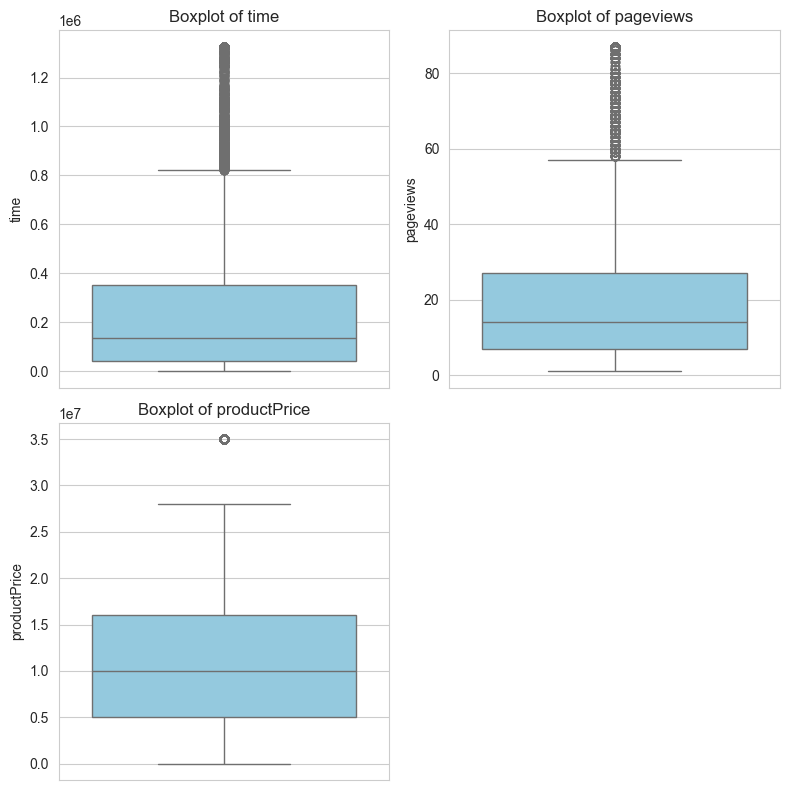

In [244]:
# Set plot style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
axes = axes.flatten()

# Plot boxplots for each numerical column
for i, col in enumerate(['time','pageviews', 'productPrice']):
    sns.boxplot(y=data[col], ax=axes[i], color="skyblue")
    axes[i].set_title(f"Boxplot of {col}")

# Remove empty subplot if odd number of plots
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


## V. Data Analysis and Visualization

In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   fullVisitorId         10000 non-null  uint64        
 1   channelGrouping       10000 non-null  object        
 2   time                  10000 non-null  int64         
 3   country               10000 non-null  object        
 4   city                  10000 non-null  object        
 5   timeOnSite            10000 non-null  float64       
 6   pageviews             10000 non-null  float64       
 7   date                  10000 non-null  datetime64[ns]
 8   visitId               10000 non-null  int64         
 9   type                  10000 non-null  object        
 10  productPrice          10000 non-null  float64       
 11  productSKU            10000 non-null  object        
 12  v2ProductName         10000 non-null  object        
 13  v2ProductCategory

### **Identifying Top Products:**

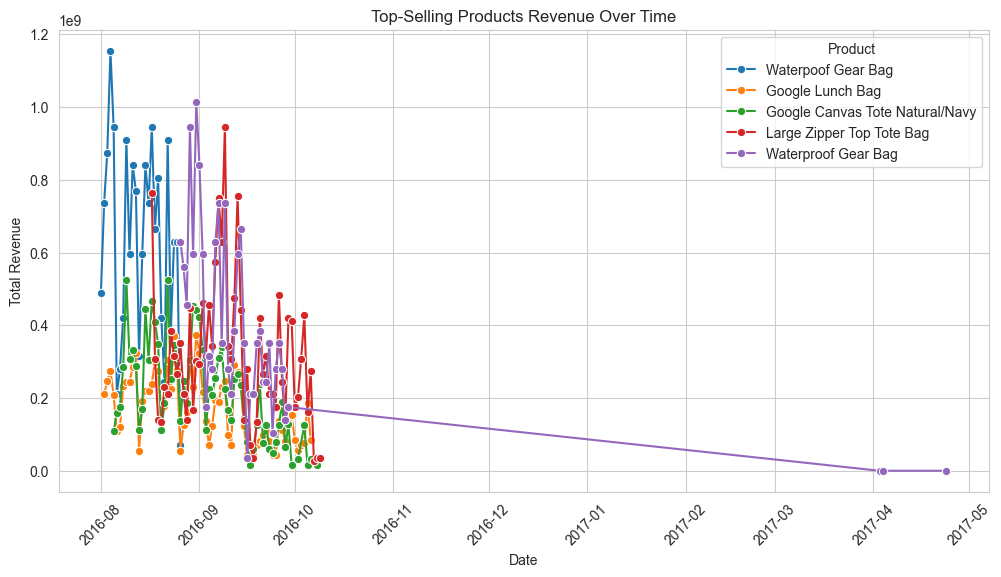

In [ ]:
daily_revenue = data.groupby(['date', 'v2ProductName'])['productPrice'].sum().reset_index()

# Select top 5 products with the highest total revenue
top_products = daily_revenue.groupby('v2ProductName')['productPrice'].sum().nlargest(5).index
filtered_data = daily_revenue[daily_revenue['v2ProductName'].isin(top_products)]

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data, x='date', y='productPrice', hue='v2ProductName', marker='o')

plt.title('Top-Selling Products Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.legend(title='Product')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
data[data['v2ProductName'] == "Large Zipper Top Tote Bag"]['date'].max()

Timestamp('2016-10-09 00:00:00')

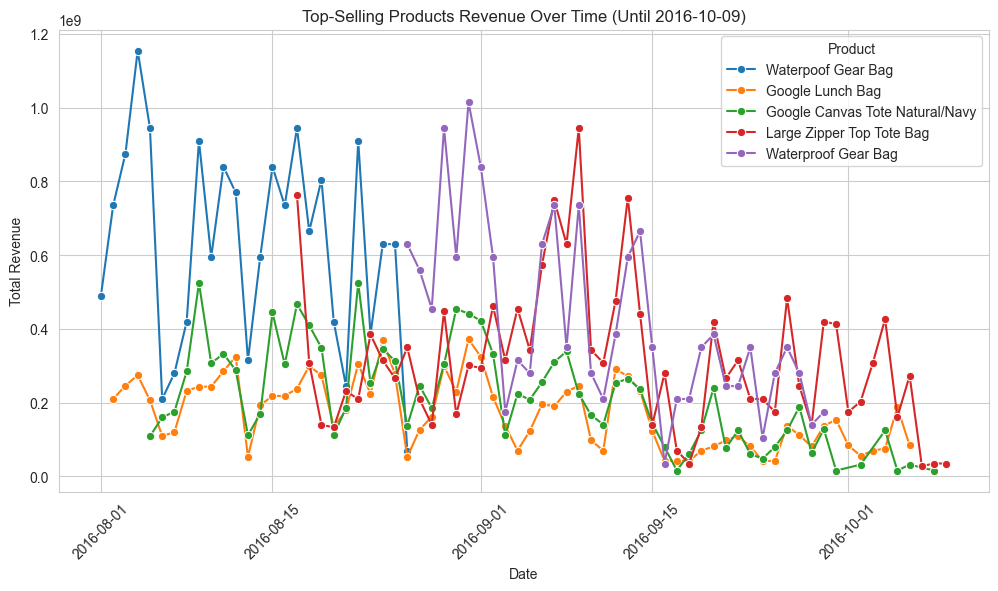

In [ ]:
# Group data by date and product, then sum the revenue
daily_revenue = data.groupby(['date', 'v2ProductName'])['productPrice'].sum().reset_index()

# Select top 5 products with the highest total revenue
top_products = daily_revenue.groupby('v2ProductName')['productPrice'].sum().nlargest(5).index
filtered_data = daily_revenue[daily_revenue['v2ProductName'].isin(top_products)]

# Limit the date range until '2016-10-09'
filtered_data = filtered_data[filtered_data['date'] <= '2016-10-09']

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data, x='date', y='productPrice', hue='v2ProductName', marker='o')

plt.title('Top-Selling Products Revenue Over Time (Until 2016-10-09)')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.legend(title='Product')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

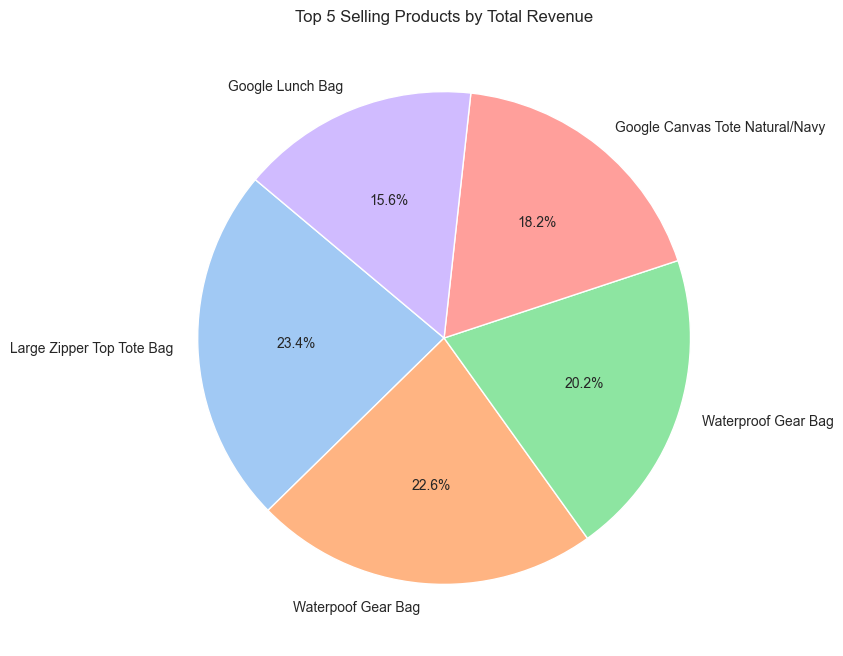

In [252]:
# Group data by product and sum the total revenue
total_revenue_per_product = data.groupby('v2ProductName')['productPrice'].sum()

# Select top 5 products with the highest total revenue
top_5_products = total_revenue_per_product.nlargest(5)

# Plot Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_products, labels=top_5_products.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Top 5 Selling Products by Total Revenue')
plt.show()

### **Detecting Anomalies:**

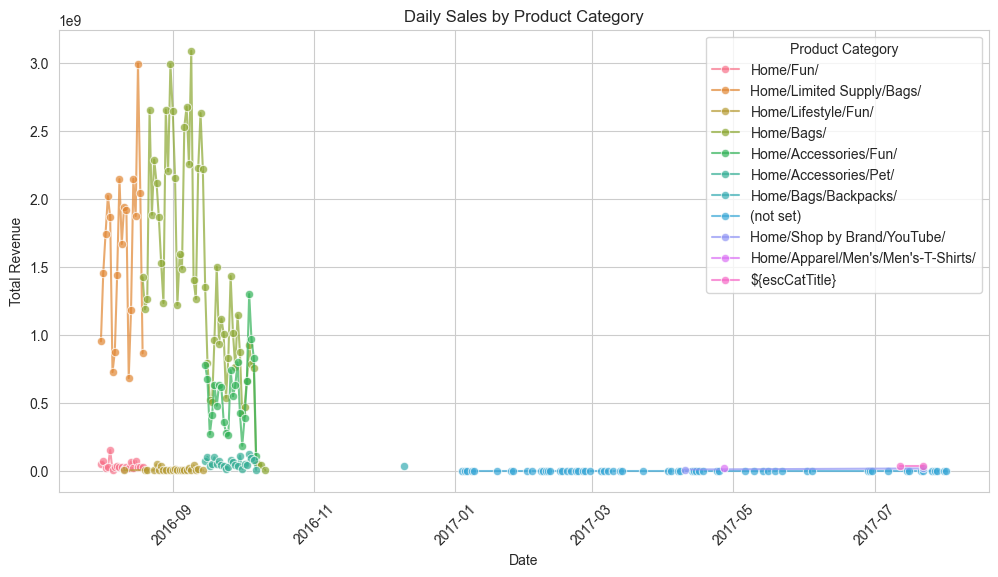

In [256]:
# Aggregate total sales per day per category
daily_sales = data.groupby(['date', 'v2ProductCategory'])['productPrice'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='date', y='productPrice', hue='v2ProductCategory', marker='o', alpha=0.7)

plt.title('Daily Sales by Product Category')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.legend(title='Product Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

1. **Sharp Spikes in Sales (Rapid Increase)** <br>
- Certain product categories, such as "Home/Fun/" and "Home/Limited Supply/Bags/", exhibit rapid spikes in total revenue around August to September 2016.
This could be due to seasonal promotions, flash sales, or new product launches that temporarily boosted demand.
Investigate if these spikes align with marketing campaigns, discounts, or special events.
2. **Sudden Drop in Sales (Rapid Decrease)** <br>
- After October 2016, there is a sharp decline in revenue for most top-performing product categories.
This could indicate stock shortages, reduced marketing efforts, or a shift in customer interest.
If the drop was unexpected, check for website issues, pricing changes, or external economic factors affecting consumer behavior.
3. **Consistently Low-Performing Categories**<br>
- Some categories (e.g., "(not set)" and "${escCatTitle}") maintain consistently low or near-zero sales throughout the period.
This could be due to misclassification in the dataset, niche product appeal, or low visibility on the platform.
Consider investigating why these categories underperform compared to others.
4. **Data Quality & Anomalies**<br>
- Some product categories have unexpected labels like "${escCatTitle}", which might indicate data extraction errors.
It’s crucial to clean and standardize category names to avoid misinterpretations of trends.

### **Finding Most Profitable Locations:**

C:\Users\rsaka\AppData\Local\Temp\ipykernel_8312\1576756799.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_locations, x='city', y='productPrice', palette='viridis')


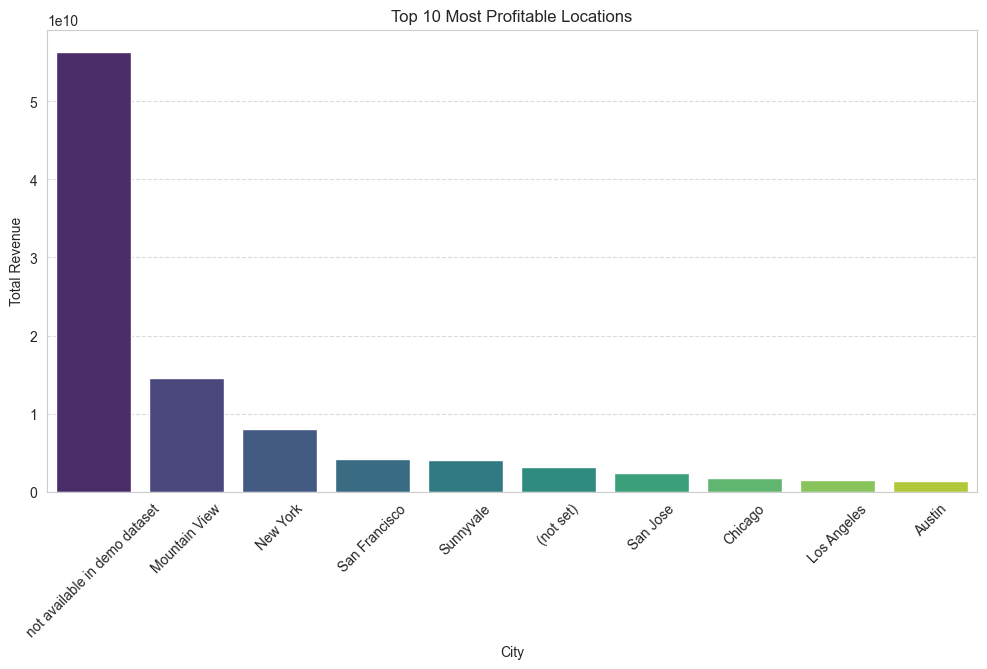

In [257]:
location_revenue = data.groupby('city')['productPrice'].sum().reset_index()
location_revenue = location_revenue.sort_values(by='productPrice', ascending=False)

# Select Top 10
top_locations = location_revenue.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_locations, x='city', y='productPrice', palette='viridis')

plt.title('Top 10 Most Profitable Locations')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Insight: (City-level Analysis) <br>
- The dataset contains anonymized data, where the highest revenue is labeled as **"not available in demo dataset."**
- Among actual locations, **Mountain View, New York, and San Francisco** generate the most revenue.
- Some locations, like **"(not set)"**, may indicate missing or improperly categorized data.

C:\Users\rsaka\AppData\Local\Temp\ipykernel_8312\2453826010.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_locations, x='country', y='productPrice', palette='viridis')


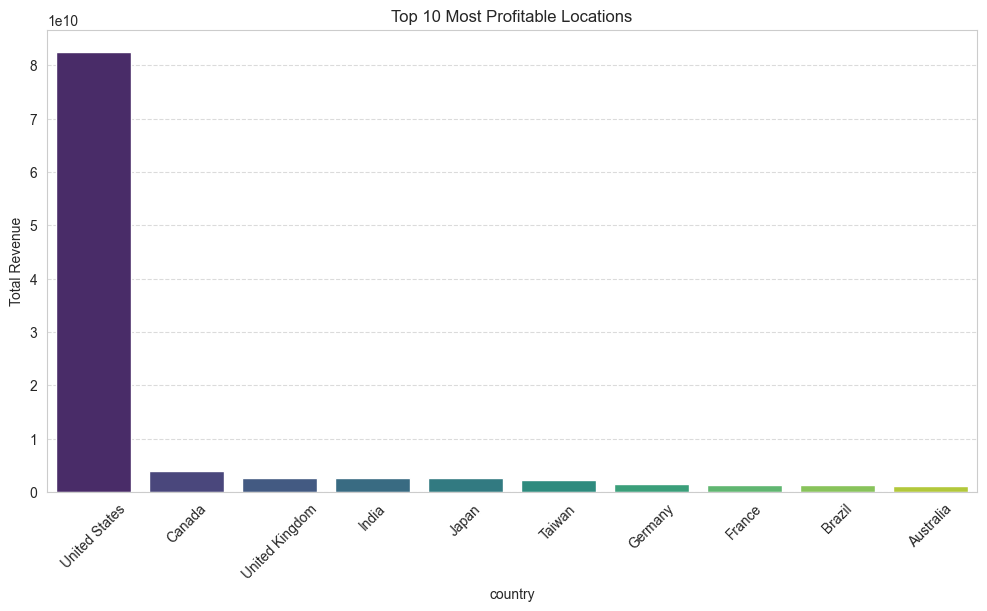

In [261]:
location_revenue = data.groupby('country')['productPrice'].sum().reset_index()
location_revenue = location_revenue.sort_values(by='productPrice', ascending=False)

# Select Top 10
top_locations = location_revenue.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_locations, x='country', y='productPrice', palette='viridis')

plt.title('Top 10 Most Profitable Locations')
plt.xlabel('country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Insight:<br>
- The **United States dominates** in revenue generation by a large margin.
- Other significant contributors include **Canada, the United Kingdom, India, Japan, and Taiwan.**
- The disparity suggests that the business operates primarily in the U.S., with international markets contributing smaller portions.